<a href="https://colab.research.google.com/github/SydneyTsuma/Hass-Consultancy-Project/blob/main/HASS_CONSULTING_COMPANY_DATA_INVESTIGATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#HASS CONSULTING COMPANY

##**DEFINING THE QUESTION**

###a) Specifying the question

####Study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables.

###b) Defining the metric of success

1. Ensuring appropriate data preprocessing :

 a. Checking for Outliers

 b. Checking for missing values



2. Predicting housing variables based on different prices

3. Compare two related regression techniques against the given data

4. Minimal to no multicollinearity between predictor variables




###c) Understanding the Context

Real estate, sometimes referred to as "real property," is technically land plus any other tangible improvement that might rest upon it or be installed in it. 
The improvement might be a building that's been erected there, or a roadway. 
It can be something that's been inserted into the ground, such as a septic system.Land with any of these structures is said to be "improved." 
It's "unimproved" when it lacks them.

How Real Estate Works

Real estate involves numerous facets, because it doesn't simply exist. It can segue from unimproved to improved. It can be purchased or sold. It might be owned by a government, a corporate entity, or by a private party. But certain components can have a direct impact on the economy: consistent improvement of land, and the individual and entities that facilitate those transfers of ownership.

###d) Recording the experimental design

1.Conducting an EDA Analysis of the data to gain more insight into our data.
*   Univariate Analysis
*   Bivariate Analysis
*   Multivariate Analysis

2.Defining the correlation between the variables. 
*   Heatmaps
*   Pearsons correlation 
*   Chi square technique

3.Defining our modelling approach

a) Checking for Multicollinearity and Heteroskedasticity in our dataset using
       
* VIF score to determine multicollinearity

* Residual plots or Bartletts test
        
b) Testing Regression techiques 

* Multiple Linear Regression
* Quantile Regression
* Ridge Regression
* Lasso Regression
* Elastic Net Regression
              

## **DATA SECTION**

##DATASET USED TO INVESTIGATE OUR DATA

The Dataset used was obtained from Kaggle. We Imported it as a CSV File to our Python notebook for further analysis

Link : [Dataset](https://http://bit.ly/IndependentProjectWeek7Dataset)

###IMPORTING LIBRARIES

In [12]:
# Data Manipulation Libraries
import pandas as pd
import numpy as np

# Data Visualisation Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

In [13]:
# Reading dataset file
housing = pd.read_csv('/content/Independent Project Week 7 - house_data.csv')
housing.head(10)

id      price  bedrooms  ...     long  sqft_living15  sqft_lot15
0  7129300520   221900.0         3  ... -122.257           1340        5650
1  6414100192   538000.0         3  ... -122.319           1690        7639
2  5631500400   180000.0         2  ... -122.233           2720        8062
3  2487200875   604000.0         4  ... -122.393           1360        5000
4  1954400510   510000.0         3  ... -122.045           1800        7503
5  7237550310  1230000.0         4  ... -122.005           4760      101930
6  1321400060   257500.0         3  ... -122.327           2238        6819
7  2008000270   291850.0         3  ... -122.315           1650        9711
8  2414600126   229500.0         3  ... -122.337           1780        8113
9  3793500160   323000.0         3  ... -122.031           2390        7570

[10 rows x 20 columns]

###DATA PREPROCESSING

In [5]:
# Determine the shape of the dataset
housing.shape

(21613, 20)

In [6]:
# Checking dataset Info
housing.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Each column has the appropriate data type hence no further changes will be made

In [7]:
# Describing our Dataset
housing.describe()

id         price  ...  sqft_living15     sqft_lot15
count  2.161300e+04  2.161300e+04  ...   21613.000000   21613.000000
mean   4.580302e+09  5.401822e+05  ...    1986.552492   12768.455652
std    2.876566e+09  3.673622e+05  ...     685.391304   27304.179631
min    1.000102e+06  7.500000e+04  ...     399.000000     651.000000
25%    2.123049e+09  3.219500e+05  ...    1490.000000    5100.000000
50%    3.904930e+09  4.500000e+05  ...    1840.000000    7620.000000
75%    7.308900e+09  6.450000e+05  ...    2360.000000   10083.000000
max    9.900000e+09  7.700000e+06  ...    6210.000000  871200.000000

[8 rows x 20 columns]

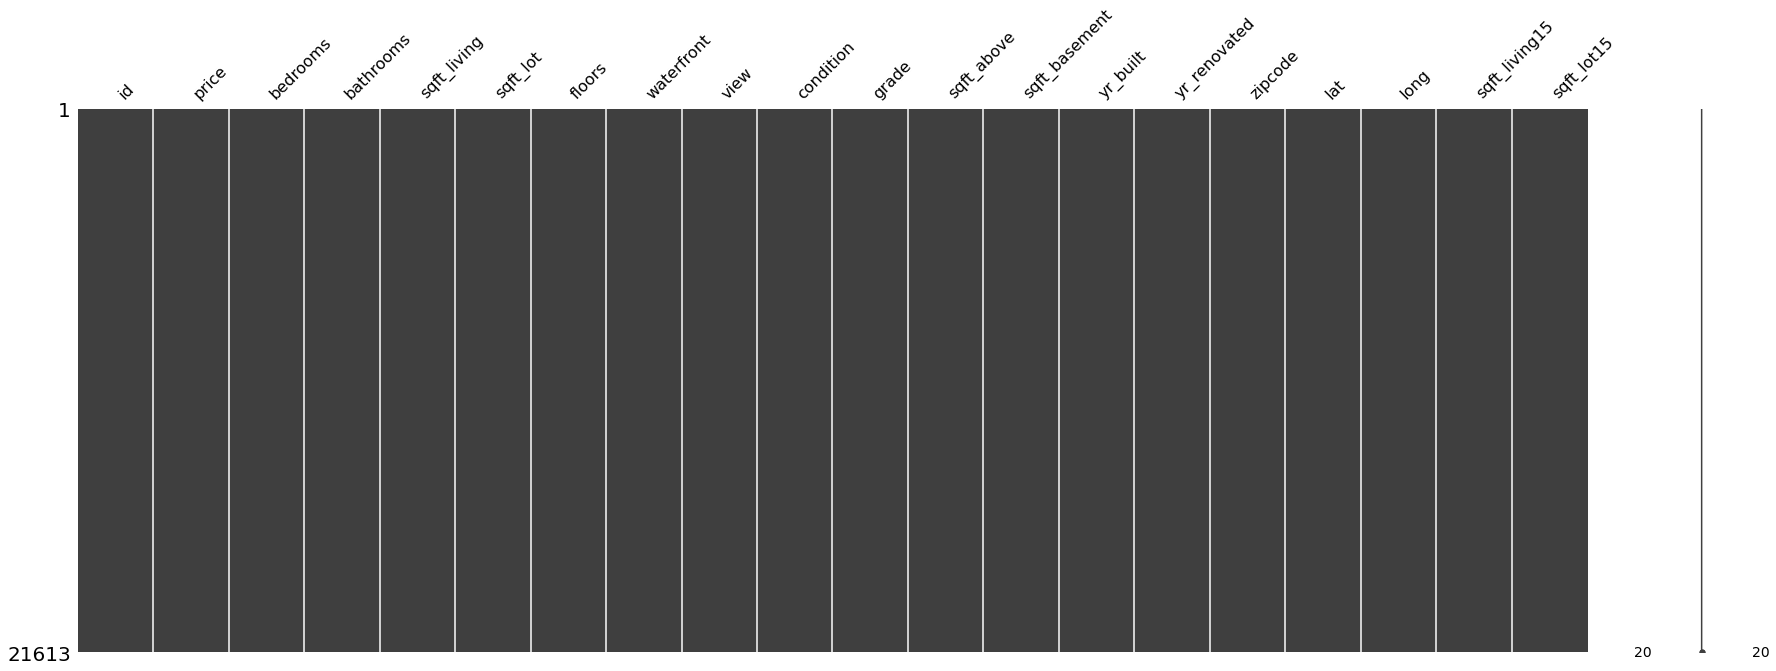

In [8]:
# Checking for missing data
missingno.matrix(housing, figsize = (30,10))

The visualisation above indicates that our dataset contains no missing data

In [9]:
# Cheking for duplicated values in the dataset 
housing.duplicated().sum()

3

In [14]:
# Dropping duplicated values
housing2 = housing.drop_duplicates()
housing2

id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
0      7129300520  221900.0         3  ... -122.257           1340        5650
1      6414100192  538000.0         3  ... -122.319           1690        7639
2      5631500400  180000.0         2  ... -122.233           2720        8062
3      2487200875  604000.0         4  ... -122.393           1360        5000
4      1954400510  510000.0         3  ... -122.045           1800        7503
...           ...       ...       ...  ...      ...            ...         ...
21608   263000018  360000.0         3  ... -122.346           1530        1509
21609  6600060120  400000.0         4  ... -122.362           1830        7200
21610  1523300141  402101.0         2  ... -122.299           1020        2007
21611   291310100  400000.0         3  ... -122.069           1410        1287
21612  1523300157  325000.0         2  ... -122.299           1020        1357

[21610 rows x 20 columns]

Check for outliers

Procedure: We shall grade outliers based on their range of values obtained during the description of our dataset.

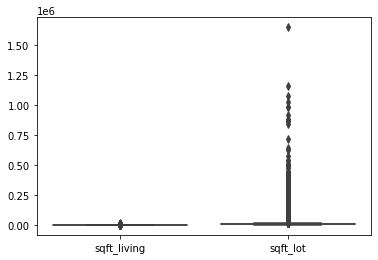

In [11]:
# Investigating outliers with regard to area 
sns.boxplot(data =housing2[['sqft_living','sqft_lot']])

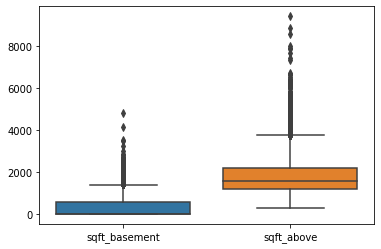

In [12]:
sns.boxplot(data =housing2[['sqft_basement','sqft_above']])

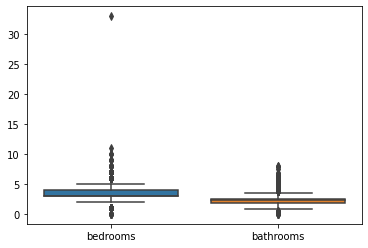

In [13]:
# Investigating outliers with regard to  the number of rooms
sns.boxplot(data =housing2[['bedrooms','bathrooms']])

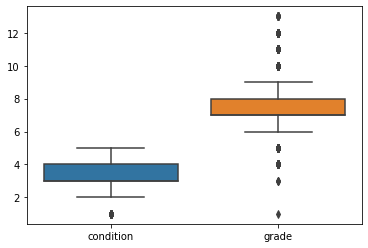

In [14]:
# Investigating Outliers with regard to status
sns.boxplot(data =housing2[['condition', 'grade']])

The results obtained indicate presence of outliers however, I will not drop them due to the Insights we may further derive from the data analysis. More data will be useful in generating an good predictive model hence we shall retain our model.Furthermore they account for a large set of the data we may be calculating.

###EXPLORATORY DATA ANALYSIS

####UNIVARIATE ANALYSIS

#####A.Categorical And Categorical Variables

Such variables do not exist in dataset hence no further analysis

#####B.Numerical variables

#####Measures of central Tendancy

In [15]:
# Mean for each column 
housing2.mean(axis=0)

id               4.580161e+09
price            5.401789e+05
bedrooms         3.370847e+00
bathrooms        2.114739e+00
sqft_living      2.079881e+03
sqft_lot         1.510829e+04
floors           1.494239e+00
waterfront       7.542804e-03
view             2.341971e-01
condition        3.409440e+00
grade            7.656779e+00
sqft_above       1.788348e+03
sqft_basement    2.915333e+02
yr_built         1.971004e+03
yr_renovated     8.432235e+01
zipcode          9.807795e+04
lat              4.756005e+01
long            -1.222139e+02
sqft_living15    1.986519e+03
sqft_lot15       1.276903e+04
dtype: float64

In [16]:
# Median for each column
housing2.median(axis=0)

id               3.904930e+09
price            4.500000e+05
bedrooms         3.000000e+00
bathrooms        2.250000e+00
sqft_living      1.910000e+03
sqft_lot         7.619000e+03
floors           1.500000e+00
waterfront       0.000000e+00
view             0.000000e+00
condition        3.000000e+00
grade            7.000000e+00
sqft_above       1.560000e+03
sqft_basement    0.000000e+00
yr_built         1.975000e+03
yr_renovated     0.000000e+00
zipcode          9.806500e+04
lat              4.757180e+01
long            -1.222310e+02
sqft_living15    1.840000e+03
sqft_lot15       7.620000e+03
dtype: float64

In [17]:
# Mode for each column
housing2.mode(axis=0)
housing2.head(1)

id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
0  7129300520  221900.0         3  ... -122.257           1340        5650

[1 rows x 20 columns]

In [18]:
# Median for each column
housing2.median(axis=0)

id               3.904930e+09
price            4.500000e+05
bedrooms         3.000000e+00
bathrooms        2.250000e+00
sqft_living      1.910000e+03
sqft_lot         7.619000e+03
floors           1.500000e+00
waterfront       0.000000e+00
view             0.000000e+00
condition        3.000000e+00
grade            7.000000e+00
sqft_above       1.560000e+03
sqft_basement    0.000000e+00
yr_built         1.975000e+03
yr_renovated     0.000000e+00
zipcode          9.806500e+04
lat              4.757180e+01
long            -1.222310e+02
sqft_living15    1.840000e+03
sqft_lot15       7.620000e+03
dtype: float64

##### Checking Data Skewness

If skewness is less than −1 or greater than +1, the distribution is highly skewed. If skewness is between −1 and −0.5 or between +0.5 and +1, the distribution is moderately skewed. If skewness is between −0.5 and +0.5, the distribution is approximately symmetric.

In [19]:
# Skewness for each column
housing2.skew(axis=0)

id                0.243414
price             4.021467
bedrooms          1.974244
bathrooms         0.511164
sqft_living       1.471532
sqft_lot         13.059170
floors            0.616523
waterfront       11.384300
view              3.396872
condition         1.032789
grade             0.771297
sqft_above        1.446758
sqft_basement     1.577814
yr_built         -0.469823
yr_renovated      4.551974
zipcode           0.405533
lat              -0.485185
long              0.885312
sqft_living15     1.108290
sqft_lot15        9.506129
dtype: float64

##### Cheking Data Kurtosis

If the kurtosis is greater than 3, then the dataset has heavier tails than a normal distribution (more in the tails). If the kurtosis is less than 3, then the dataset has lighter tails than a normal distribution (less in the tails).

In [20]:
# Kurtosis for each column
housing2.kurtosis(axis=0)

id                -1.260438
price             34.517438
bedrooms          49.060108
bathrooms          1.279637
sqft_living        5.242223
sqft_lot         285.040621
floors            -0.484246
waterfront       127.614090
view              10.902118
condition          0.525688
grade              1.191090
sqft_above         3.402008
sqft_basement      2.714886
yr_built          -0.657207
yr_renovated      18.723733
zipcode           -0.853604
lat               -0.676601
long               1.049829
sqft_living15      1.597009
sqft_lot15       150.743275
dtype: float64

#####Distributions Summary

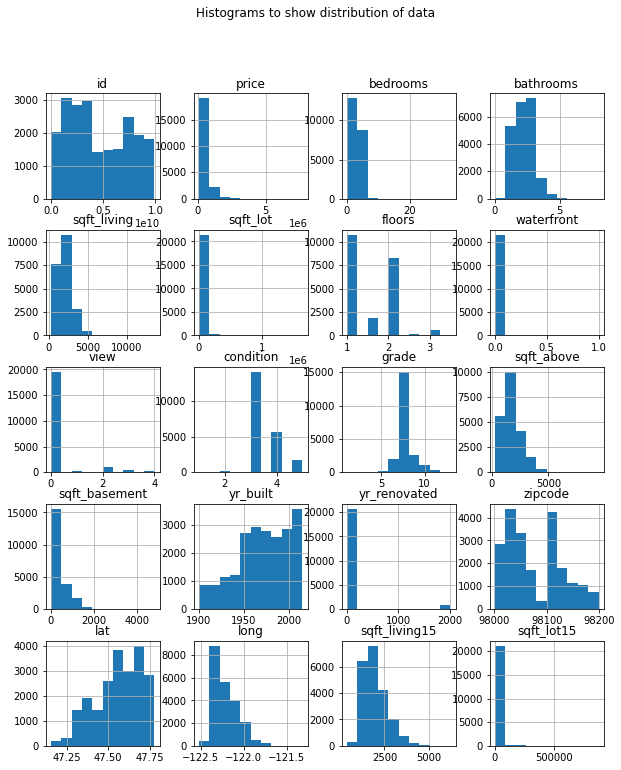

In [25]:
housing2.hist(figsize=(10,12))
plt.suptitle('Histograms to show distribution of data')
plt.show()

####BIVARIATE ANALYSIS

#####Visualizing Heat map

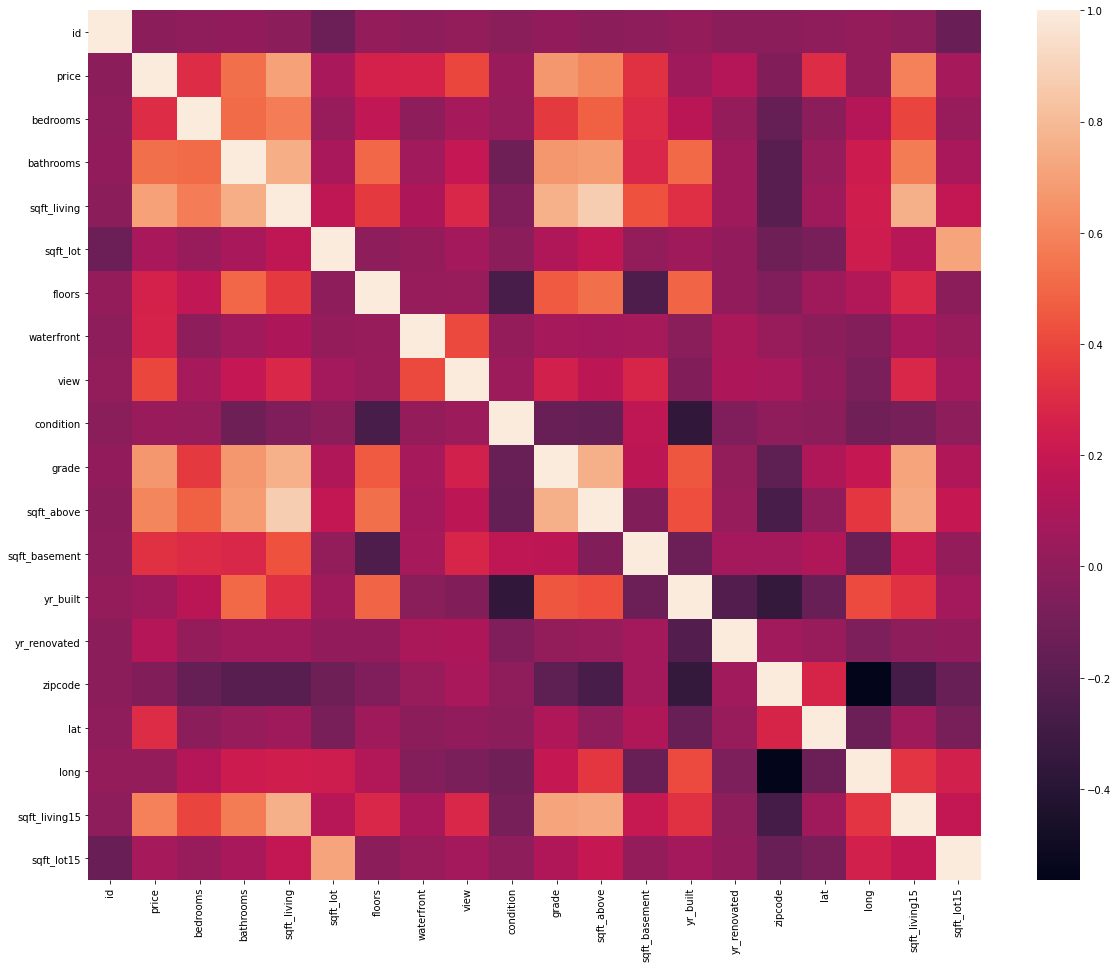

In [22]:
# Showing correlation of the data
plt.figure(figsize=(20,16))
sns.heatmap(housing2.corr())
plt.show()

#####Visualising Line Plots

We shall use the average price as our main metric to idetify different trends during the the years

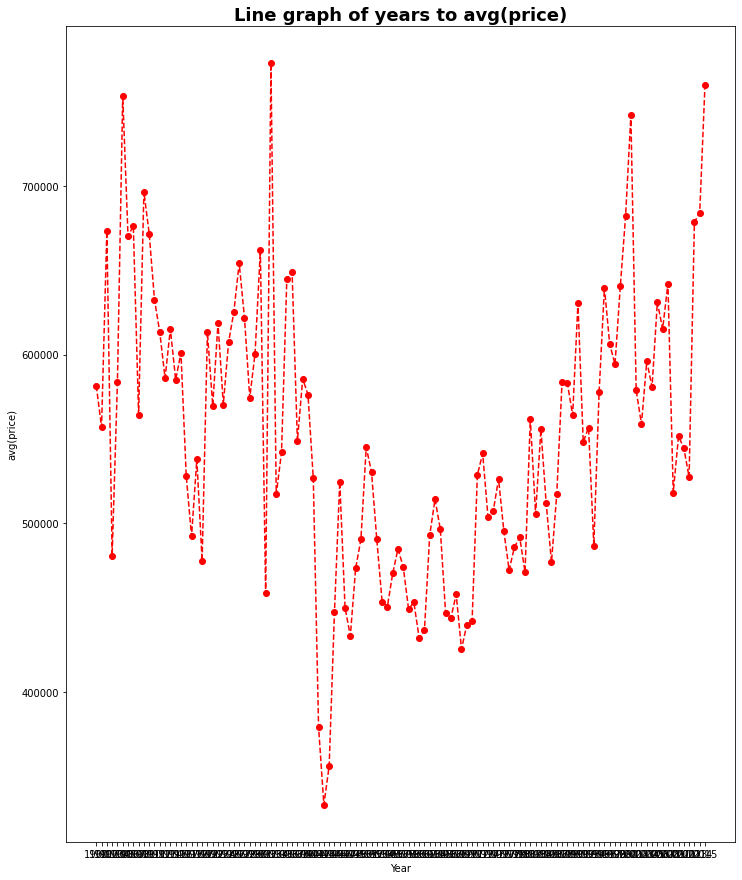

<Figure size 432x288 with 0 Axes>

In [35]:
# Filter the data with respect to the condition of the houses
scatter =housing2.groupby('yr_built')['price'].mean().reset_index(name = 'avg_per_year')
# Plot the data
x = scatter['yr_built']
y= scatter['avg_per_year']
plt.figure(figsize=(12,15))
plt.plot(x,y,color = 'red',marker = 'o',linestyle = '--')
plt.xlabel('Year')
plt.xticks(x)
plt.ylabel('avg(price)')
plt.title('Line graph of years to avg(price)',fontsize = 18,fontweight='bold')
plt.show()
plt.savefig("Housing prices per year.png")

Prices of houses generally have been flactuating through the years 

###### Housing condition over the years 

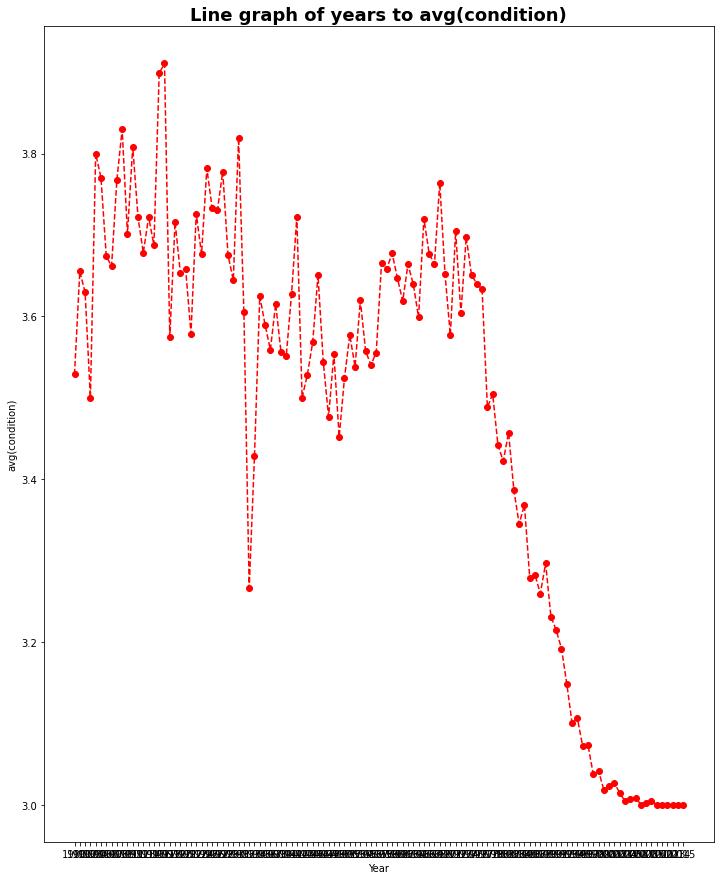

<Figure size 432x288 with 0 Axes>

In [32]:
# Filter the data with respect to the condition of the houses
scatter =housing2.groupby('yr_built')['condition'].mean().reset_index(name = 'avg_per_year')
# Plot the data
x = scatter['yr_built']
y= scatter['avg_per_year']
plt.figure(figsize=(12,15))
plt.plot(x,y,color = 'red',marker = 'o',linestyle = '--')
plt.xlabel('Year')
plt.xticks(x)
plt.ylabel('avg(condition)')
plt.title('Line graph of years to avg(condition)',fontsize = 18,fontweight='bold')
plt.show()
plt.savefig("Housing conditions per year.png")

Prices generally went down over the years with respect to the condition of the houses deteroriating

######Living space area over the years 

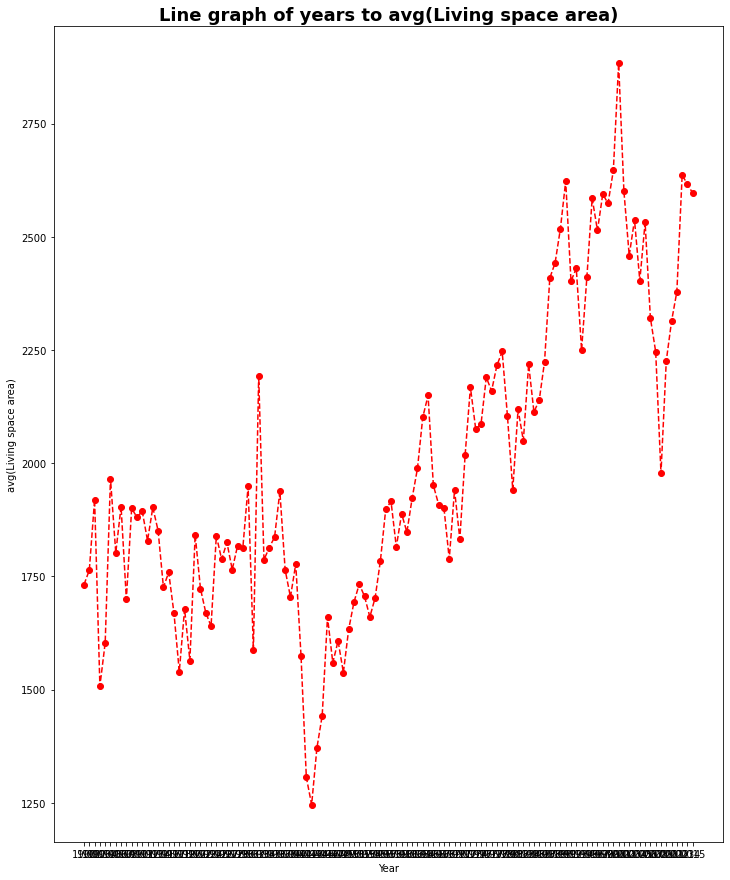

<Figure size 432x288 with 0 Axes>

In [37]:
# Filter the data with respect to the condition of the houses
scatter =housing2.groupby('yr_built')['sqft_living'].mean().reset_index(name = 'avg_per_year')
# Plot the data
x = scatter['yr_built']
y= scatter['avg_per_year']
plt.figure(figsize=(12,15))
plt.plot(x,y,color = 'red',marker = 'o',linestyle = '--')
plt.xlabel('Year')
plt.xticks(x)
plt.ylabel('avg(Living space area)')
plt.title('Line graph of years to avg(Living space area)',fontsize = 18,fontweight='bold')
plt.show()
plt.savefig("Living space area per year.png")

A general Increase rise was noted over the years with an increase in the Living space area

####MULTIVARIATE ANALYSIS

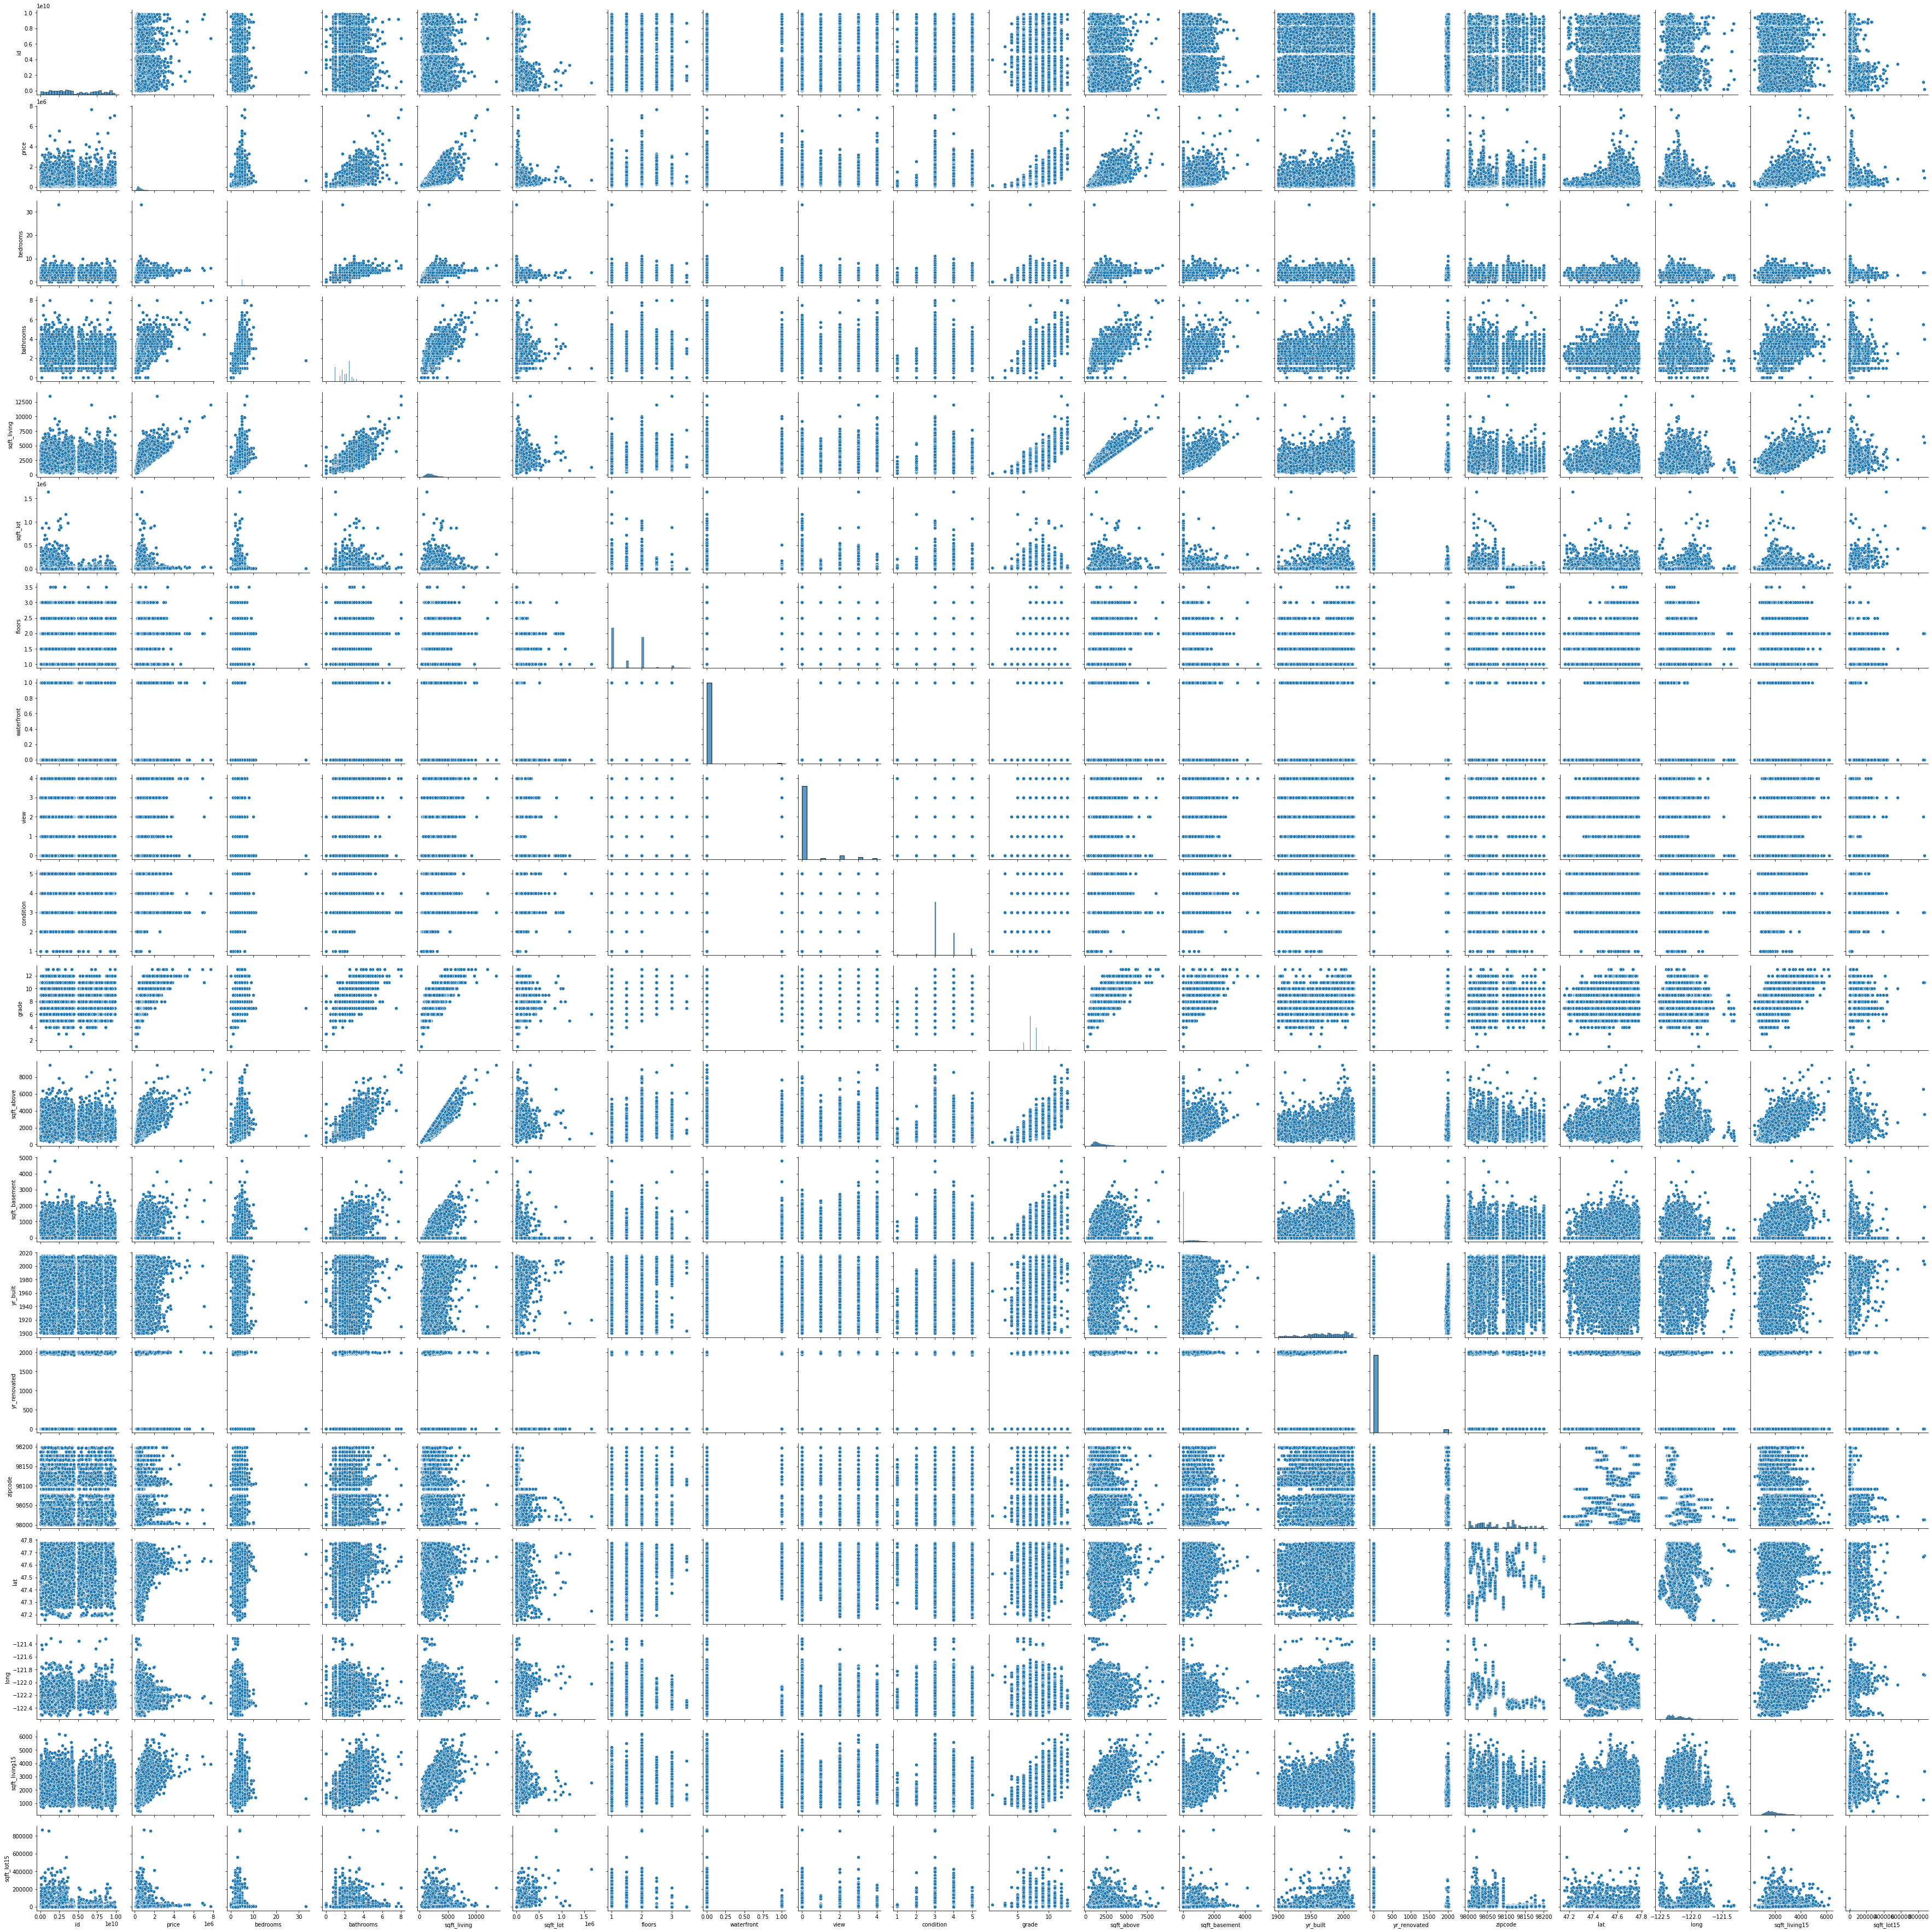

In [38]:
# Plotting a pair plot

sns.pairplot(housing2)
plt.show()

There is a positive relation between sqft_living (Area of Living room), sqft_living15, sqft_above and price. 

###IMPLEMENTING THE SOLUTION

###Multiple Linear Regression

####Multicollinearity

In [16]:
# Drop dependent variable ,price to focus on our independent variables only.
Independent_V= housing2.drop(columns=['price'])

# Display of the correlations between the variables
correlations = Independent_V.corr()

correlations

id  bedrooms  ...  sqft_living15  sqft_lot15
id             1.000000  0.001354  ...      -0.002869   -0.138778
bedrooms       0.001354  1.000000  ...       0.391633    0.029233
bathrooms      0.005093  0.515935  ...       0.568665    0.087191
sqft_living   -0.012239  0.576674  ...       0.756420    0.183285
sqft_lot      -0.132101  0.031699  ...       0.144620    0.718556
floors         0.018482  0.175448  ...       0.279861   -0.011250
waterfront    -0.002717 -0.006583  ...       0.086469    0.030702
view           0.011785  0.079433  ...       0.280404    0.072577
condition     -0.023686  0.028422  ...      -0.092854   -0.003424
grade          0.008093  0.357003  ...       0.713208    0.119265
sqft_above    -0.010857  0.477619  ...       0.731870    0.194060
sqft_basement -0.005084  0.303077  ...       0.200367    0.017260
yr_built       0.021218  0.154276  ...       0.326298    0.070999
yr_renovated  -0.016688  0.018695  ...      -0.002841    0.007837
zipcode       -0.008129 -0.152721  ...      -0.279033   -0.147257
lat           -0.001861 -0.008953  ...       0.048839   -0.086423
long           0.020776  0.129474  ...       0.334592    0.254475
sqft_living15 -0.002869  0.391633  ...       1.000000    0.183194
sqft_lot15    -0.138778  0.029233  ...       0.183194    1.000000

[19 rows x 19 columns]

VIF Score allocation range : 

1 = not correlated.

1 - 5 = moderately correlated.

5 = highly correlated.

In [17]:
# Identify the VIF score
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

id  bedrooms  ...  sqft_living15  sqft_lot15
id             1.028193 -0.000924  ...       0.010517    0.104495
bedrooms      -0.000924  1.652160  ...       0.025275    0.085322
bathrooms     -0.002229 -0.461424  ...       0.091997    0.071217
sqft_living   -0.002749 -0.616334  ...      -1.068477   -0.051613
sqft_lot       0.077703  0.049257  ...       0.164728   -1.451411
floors        -0.011347  0.049859  ...       0.272516    0.071504
waterfront     0.007505  0.063071  ...       0.054473   -0.017718
view          -0.034339  0.114461  ...      -0.325739   -0.010958
condition      0.023553 -0.050655  ...       0.076149   -0.025849
grade         -0.037917  0.306975  ...      -0.911987    0.068010
sqft_above     0.034833 -0.319496  ...      -0.571969   -0.125890
sqft_basement  0.000909 -0.187378  ...       0.043757   -0.034738
yr_built       0.016544  0.134494  ...       0.077865   -0.032064
yr_renovated   0.018325  0.045783  ...       0.099453   -0.020333
zipcode       -0.002636  0.080176  ...       0.210213   -0.015756
lat            0.015112  0.050825  ...      -0.094638    0.038192
long          -0.075762  0.017622  ...      -0.355268   -0.168575
sqft_living15  0.010517  0.025275  ...       2.979755   -0.124524
sqft_lot15     0.104495  0.085322  ...      -0.124524    2.146279

[19 rows x 19 columns]

In [18]:
# Dropping columns with relatively higher VIF scores
revised = Independent_V.drop(columns=['grade' ,'sqft_basement', 'bathrooms','sqft_living','sqft_above','sqft_lot','yr_built'])

correlations = revised.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)


id  bedrooms  ...  sqft_living15  sqft_lot15
id             1.024755  0.002723  ...       0.005421    0.159731
bedrooms       0.002723  1.208950  ...      -0.464721    0.050350
floors        -0.005858 -0.112902  ...      -0.272832    0.069171
waterfront     0.007655  0.045994  ...       0.024616   -0.004701
view          -0.035604  0.021161  ...      -0.454403   -0.061970
condition      0.019569 -0.107740  ...       0.074946   -0.015165
yr_renovated   0.015608 -0.039561  ...       0.033433   -0.020808
zipcode       -0.002549  0.064185  ...       0.245532   -0.027125
lat            0.008059  0.030472  ...      -0.186715    0.073403
long          -0.063037  0.029982  ...      -0.314526   -0.267940
sqft_living15  0.005421 -0.464721  ...       1.601015   -0.149752
sqft_lot15     0.159731  0.050350  ...      -0.149752    1.124194

[12 rows x 12 columns]

VIF Scores were generally low however we dropped columns with VIF scores above 1.5 to improve the accuracy of our model

In [19]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = revised.values
y = housing2['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# This is our prediction for price based on our model
y_predict = regressor.predict(X_test)

# Create a residual

residuals = np.subtract(y_predict, y_test)

# Describing our our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

-1220.053371600167

Residual plots

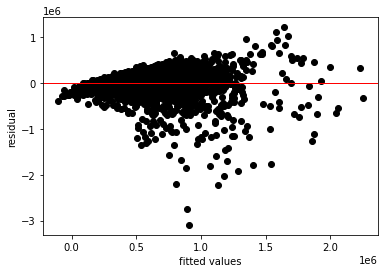

In [22]:
# Plot residual values
import matplotlib.pyplot as plt

plt.scatter(y_predict, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

Our residuals are highly centred towards the mean hence no obvious patterns

####Testing for Heterosketasticity

####Bartletts

If the test_result is greater than the critical value, then we reject our null
hypothesis. This would mean that there are patterns to the variance of the data
Otherwise, we can identify no patterns, and we accept the null hypothesis that the variance is homogeneous across our data

In [25]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_predict, residuals)

# Compute a critical value of the chi squared distribution
degree_of_freedom = len(y_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')


5012.248004979936
the variances are homogeneous!


Modelling predictions

In [26]:
# Making the predcitions
y_pred = regressor.predict(X_test)

# Comparing the actual output values for x_test with the predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

Actual      Predicted
0      680200.0  539016.844124
1      550000.0  551051.298141
2      230000.0  330994.833905
3      379950.0  534007.950806
4     1060000.0  703197.930701
...         ...            ...
4317   300000.0  246059.340723
4318   395000.0  581546.684396
4319   395000.0  338315.417963
4320   489000.0  501430.648262
4321   382500.0  351840.262862

[4322 rows x 2 columns]

In [27]:
# Evaluating the Algorithm

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 150684.49030502082
Mean Squared Error: 60377515946.246086
Root Mean Squared Error: 245718.3671324675


In [28]:
# Obtaining RMSE and R2 score

from sklearn.metrics import r2_score

r2 = r2_score(y_test,y_pred)
print("The R2 score for the Linear Regression model is: ", r2)

The R2 score for the Linear Regression model is:  0.5405765520947801


The score indicates that Linear regression is a poor model to use for our case

####Heteroscedasticity

###Lasso Regression


In [29]:
# Loading our libraries
from sklearn.linear_model import Lasso
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [30]:
# Splitting data into dependent and Independent variables
X = revised
y = housing2['price'].values

In [31]:
# Standadizing our features
#
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [38]:
# Creating lasso regression with alpha value
regr = Lasso(alpha=0.5)

# Fitting the linear regression
model = regr.fit(X_std, y)
model

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

###Ridge Regression

In [33]:
# Import libraries
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [34]:
# Creating our baseline regression model
# This is a model that has no regularization to it
# 
regression = LinearRegression()
regression.fit(X,y)
first_model = (mean_squared_error(y_true=y,y_pred=regression.predict(X)))
print(first_model)

61128625943.026794


In [39]:
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [40]:
search.fit(X,y)
search.best_params_
{'alpha': 0.01}
abs(search.best_score_) 

61420543770.413376

In [41]:
ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(X,y)
second_model = (mean_squared_error(y_true=y,y_pred=ridge.predict(X)))
print(second_model)

61134265504.95428


In [42]:
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,housing2.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline


{'bathrooms': 605641.5406167257,
 'bedrooms': 84714.7353558126,
 'condition': -357468.79289319523,
 'floors': 79.0217766621455,
 'grade': 250.40280924420807,
 'id': -1.240935755204254e-06,
 'price': 37196.68624579384,
 'sqft_above': 0.33320030598406447,
 'sqft_living': 84876.21562635888,
 'sqft_lot': 53304.76002845004,
 'view': 748449.0771300669,
 'waterfront': -517.5136102575443}

In [44]:
r2 = r2_score(y_test,y_pred)
print("The RMSE for the ridge model: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("The R2 score for the ridge model is: ", r2)

The RMSE for the ridge model:  245718.3671324675
The R2 score for the ridge model is:  0.5405765520947801


###Elastic Net  Regression

In [45]:
# Importing our libraries
import pandas as pd
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.width', 10000)
from sklearn.linear_model import ElasticNet


In [46]:
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [ ]:
search.fit(X,y)
search.best_params_
abs(search.best_score_)

In [47]:
elastic=ElasticNet(normalize=True,alpha=0.001,l1_ratio=0.75)
elastic.fit(X,y)
second_model=(mean_squared_error(y_true=y,y_pred=elastic.predict(X)))
print(second_model)

106222675525.68512


In [48]:
r2 = r2_score(y_test,y_pred)
print("The RMSE for the ridge model: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("The R2 score for the ridge model is: ", r2)

The RMSE for the ridge model:  245718.3671324675
The R2 score for the ridge model is:  0.5405765520947801


Conclusion

Based on the data Investigation above it is clear that Elastic Net regression model would be more Ideal in this situation as it gives a higher prediction accuracy compared to other techniques. Furthermore we used the R2 score because it proves to be the most accurate estimator of the model accuracy.